# Least-Squares Regression Project: `LotArea` and `SalePrice` in Ames, Iowa Housing Dataset
## Statistics, Fall 2021
### Name: Michael Hlavaty

![Houses](ames_houses.jpeg)

## Sources

* https://www.kaggle.com/c/house-prices-advanced-regression-techniques <-- where dataset was obtained from
* http://jse.amstat.org/v19n3/decock.pdf <-- description of dataset
* https://www.tmwr.org/ames.html <-- validation of dataset
* https://medium.com/@rbkim1990/going-through-the-data-science-process-and-the-ames-ia-housing-dataset-44dbd0560510 <-- cover image

## Introduction

There are many factors that go into the valuation of a house. My parents recently bought a property in Hoboken, New Jersey. As a teenager with little experience in the process of buying a house, I expect that the larger the property size, the higher the valuation of the house. I wonder, how strong is the relationship between the size of the property and the sale price of the house in Ames, Iowa? Would it be reasonable to use a linear model to relate these two factors?

I will be using a dataset for house prices for houses in Ames, Iowa betwen 2006 and 2010, published by a professor in Statistics named Dean De Cock in 2011. According to the data science commuity, this is a reputable dataset (https://www.tmwr.org/ames.html), and it has been described as a modernized version of the controversial Boston Housing dataset (http://jse.amstat.org/v19n3/decock.pdf), which I analyzed in my Computer Science 630 class this year. The Ames Housing dataset includes more than 70 explanatory variables, and in this project, I explore the relationship between a house's Lot Area and Sale Price from the dataset for House Prices in Ames, Iowa and attempt to relate the two factors using a least-square regression line (LSRL).

### Data

In [1]:
# Importing a number of helpful Python libraries for calculating and interpreting data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import math

In [2]:
# Importing the entire dataset and naming the dataset `data`
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv') 
data.head() # View a sample of data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Okay, this shows us all of the variables included in the dataset. For this project, we are only focusing on the `LotArea` and `Sale Price` for two reasons. Firstly, both variables are quantitative, so they can be modeled with a scatterplot. Secondly, I my experiences with houses cause me to expect there to be a linear relationship for these two features.

* `LotArea` is the lot area of the house in square feet. This is the explanatory variable because I am analyzing how changes in `LotArea` _explain or cause_ a change in `SalePrice`.
* `SalePrice` is the actual sale price of the house in US dollars. This is the response variable because I am analyzing how the `SalePrice` _responds_ to the value of the `LotArea`.

I want to find out if a linear model is appropriate for comparing `LotArea` and `SalePrice`. If so, how well does a LSRL fit these data?

To do this, I will first plot the data in a scatterplot and residual plot. If the linear model appears to be appropriate, I will use the `r` and `r^2` values to analyze how well the LSRL fits the dataset.

## Diving into `LotArea` and `SalePrice`

In [3]:
# Creating and viewing a table for LotArea and SalePrice
LotArea_x_SalePrice = data[['LotArea', 'SalePrice']]
LotArea_x_SalePrice

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [4]:
# Looking for any missing data
LotArea_x_SalePrice[LotArea_x_SalePrice.isnull().any(axis=1)]

,LotArea,SalePrice


Great! There appears to be no missing data for these two variables. Let's start comparing analyzing these two variables.

### Summary for Explanatory Variable: `LotArea`

In [5]:
# Finding some basic numerical statistics for `LotArea`
data[['LotArea']].describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


Median LotArea: 9478.5 sq. ft.


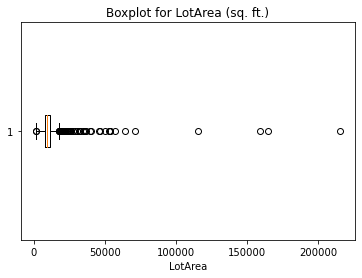

In [6]:
# Creating a boxplot for LotArea
plt.boxplot(data.LotArea, vert=False)
plt.xlabel("LotArea")
plt.title("Boxplot for LotArea (sq. ft.)")
print("Median LotArea: {} sq. ft.".format(np.median(data.LotArea)))
plt.show()

The average `LotArea` for a house is about 10,517 sq. ft., and the median `LotArea` is around 9,479 sq. ft. The shape of the boxplot for `LotArea` appears to be right-skewed with many outliers between 30,000 and 215,245 sq. ft. There appears to be a few outlying houses close to a `LotArea` of 0 sq. ft. Although the distribution for the houses' `LotArea` is relatively spread out, with a minimum `LotArea` of 1,300 sq. ft. and a maximum `LotArea` of 215,245 sq. ft (range = 213,945 sq. ft.), the middle 50%, or IQR, is 4,048 sq. ft., meaning that the middle 50% `LotArea` for the houses is relatively clustered together.

### Summary for Response Variable: `SalePrice`

In [7]:
# Finding some basic numerical statistics for `SalePrice`
data[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


Median SalePrice: 163000.0 USD


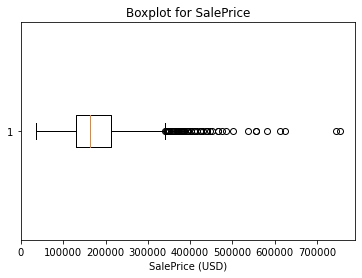

In [8]:
# Creating a boxplot for SalePrice
plt.boxplot(data.SalePrice, vert=False)
plt.xlabel("SalePrice (USD)")
plt.title("Boxplot for SalePrice")
print("Median SalePrice: {} USD".format(np.median(data.SalePrice)))
plt.show()

The average house's `SalePrice` is about 180,921 USD, and the median `SalePrice` is around 163,000 USD. The shape of the boxplot for the distribution of houses' `SalePrice` appears to be right-skewed with many outliers between 330,000 and 755,000 USD. There appears to be no outliers in the `SalePrice` < 130,000 USD. Although the distribution for the houses' `SalePrice` is relatively spread out, with a minimum `SalePrice` of 34,900 USD and a maximum `SalePrice` of 755,000 USD (range = 720,100 USD), the middle 50%, or IQR, is 84,025 USD, meaning that the middle 50% `SalePrice` for the houses is relatively clustered together.

### Scatterplots for `LotArea` and `SalePrice`

LSRL: y_hat = 158836.15189687657+2.0999719517076754x



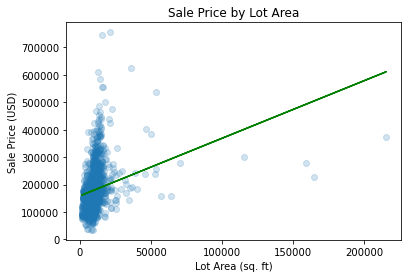

In [9]:
# Creating a scatterplot comparing LotArea and SalePrice
lot_areas = np.array([i for i in data.LotArea])
sale_prices = np.array([i for i in data.SalePrice])
plt.scatter(lot_areas, sale_prices, alpha=0.2)
plt.title("Sale Price by Lot Area")
plt.xlabel("Lot Area (sq. ft)")
plt.ylabel("Sale Price (USD)")

(slope, intercept) = linregress(lot_areas,sale_prices)[:2]
y_pred = intercept + slope*lot_areas
plt.plot(lot_areas,y_pred, color="green", label="Fitted line")

print("LSRL: y_hat = {}+{}x\n".format(intercept, slope))

plt.show()

### Analysis of Scatterplot for `SalePrice` by `LotArea`

There appears to be a very weak, positive, linear association between the `LotArea` of a house and its `SalePrice`. In the scatterplot relating `LotArea` and `SalePrice`, there appear to be many outliers in both the x-axis and y-axis. For example, in that scatterplot, there are a lot of observations with `LotArea` > 20,000 sq. ft. that deviate from the large blob of values around 0 < `LotArea` < 20,000 sq. ft. These deviating observations can be considered as influential observations because they appear to bring the slope of the LSRL down from the expected, greater slope for the LSRL that would travel through the blob. As a result of the influential observations, the LSRL appears to not travel through the majority of the points (houses) with `LotArea` < 20,000 sq. ft. This is especially relevant because the alpha-gradient shading demonstrates that the data is highly concentrated around values with `LotArea` < 20,000 sq.ft.

Based off the scatterplot and the path of the LSRL, from a visual standpoint, relating `LotArea` to `Saleprice`, using a linear model would probably not be appropriate.

## Diving into Sliced Data for `LotArea` and `SalePrice`

If I remove the influential observations and zoom in on the blob, the LSRL might be more appropriate, especially from a visual standpoint.

In [10]:
# Removing all data with LotArea > 20,000 sq. ft., as these values appear to be deviating from the blob
sliced_data = data[data.LotArea < 20000]

### Scatterplot for Sliced Data for `LotArea` and `SalePrice`

Slope: 9.52677794291575
Intercept: 89048.88524500681
r value: 0.41875319304983233
r^2: 0.17535423668943015

LSRL: y_hat = 89048.88524500681+9.52677794291575x



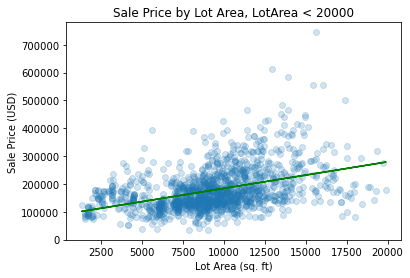

In [11]:
# Creating a scatterplot comparing LotArea and SalePrice
lot_areas = np.array([i for i in sliced_data.LotArea])
sale_prices = np.array([i for i in sliced_data.SalePrice])
plt.scatter(lot_areas, sale_prices, alpha=0.2)
plt.title("Sale Price by Lot Area, LotArea < 20000")
plt.xlabel("Lot Area (sq. ft)")
plt.ylabel("Sale Price (USD)")

(slope, intercept, rvalue) = linregress(lot_areas,sale_prices)[:3]
y_pred = intercept + slope*lot_areas
plt.plot(lot_areas,y_pred, color="green", label="Fitted line")

print("Slope: {}\nIntercept: {}\nr value: {}\nr^2: {}\n".format(slope, intercept, rvalue, rvalue**2))
print("LSRL: y_hat = {}+{}x\n".format(intercept, slope))

plt.show()

### Residual Plot for Sliced Data for `LotArea` and `SalePrice`

Standard Deviation of Residuals: $68738.58030266473


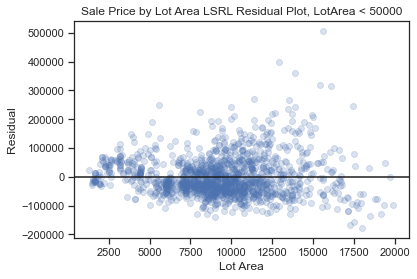

In [12]:
# Creating a residual plot for the LSRL relating LotArea and SalePrice
def get_y_hat(x_set):
    y_hats = []
    for x in x_set:
        y_hat = slope*x + intercept
        y_hats.append(y_hat)
    return y_hats

y_hats = get_y_hat(lot_areas)
residuals = sale_prices - y_hats
# std. dev. of residuals (s) = sqrt(sigma(residuals^2) / n-1)
s = math.sqrt((sum(residuals**2)) / (len(lot_areas)-1))
print("Standard Deviation of Residuals: ${}".format(s))

import seaborn
seaborn.set(style='ticks')
plt.plot(lot_areas, residuals,'o',alpha=0.2)
plt.axhline(y=0, color='k')
plt.ylabel("Residual")
plt.xlabel("Lot Area")
plt.title("Sale Price by Lot Area LSRL Residual Plot, LotArea < 50000")
plt.show()

### Analysis for Sliced `LotArea` and `SalePrice` Graphs

In the scatterplot relating `LotArea` and `SalePrice` where the `LotArea` values are all less than 20,000 sq. ft, there appears to be a moderately strong, positive, linear relationship relating the sliced `LotArea` and `SalePrice` data. There are a couple outliers in the scatterplot relating the sliced `LotArea` and `SalePrice` values. For example, there are houses with `LotArea` between 12,500 and 17,500 sq. ft. with a `SalePrice` that is significantly greater than most other houses with a `LotArea` between that range. Conversely, there are also houses with a `LotArea` between 17,500 sq. ft. and 20,000 sq. ft. with a `SalePrice` that is less than most other houses with a `LotArea` between that range. In the residual plot above, there does not appear to be any obvious patterns. Thus, based off the scatterplot and residual plot, a linear model relating the sliced data for `SalePrice` and `LotArea` is reasonable.

From the computer output, the estimated `SalePrice` based on the `LotArea` is modeled with the LSRL of `predicted_SalePrice` = 89048.88524500681+9.52677794291575*`LotArea`. This means that the predicted `SalePrice` of a house increases approximately 9.53 USD for every increase of 1 sq. ft. of `LotArea`. The LSRL intercept, 89048.88524500681 USD, represents the estimated value of a house with a `LotArea` = 0. To demonstrate the LSRL, it predicts a `SalePrice` for a house with a `LotArea` of 15,000 USD to be around (89048.88524500681+9.52677794291575(15,000)) 231,951 USD. If we look at the scatterplot for the sliced data, there appear to be houses with a `LotArea` of 15,000 sq. ft. whose `SalePrice` is between 200,000 and 300,000 USD. So, the LSRL's prediction seems reasonable.

The `r-value` = 0.41875319304983233, meaning that the distributions of `LotArea` and `SalePrice` are moderately strongly correlated. The standard deviation of the residuals is `s` = 68738.58030266473 USD, meaning that the LSRL's predicted values will typically be off by 68738.58 USD when using a linear model to relate `LotArea` and `SalePrice`. Finally, the `r^2-value` = 0.17535423668943015, meaning that around 17.5% of the `SalePrice` variation is accounted by the LSRL relating `LotArea` and `SalePrice`.

Based off the scatterplot, path of the LSRL in the scatterplot, moderately strong correlation, and lack of obvious pattern in the residual plot relating the sliced values of `LotArea` < 20,000 sq. ft. to `SalePrice`, using a linear model is reasonably appropriate, but the predictions may not be very accurate. The LSRL's typical prediction error is around 68738.58 USD, and around 82% of the variation in the dataset is unaccounted for by the LSRL.

## Conclusion

In the house pricing dataset for houses in Ames, Iowa, using a linear model to compare each house's `LotArea` to its `SalePrice` does not seem reasonable, but using a linear model to compare each house's `LotArea` to its `SalePrice` when the house's `LotArea` < 20,000 sq. ft. is more reasonable.

A potential problem with the analysis of `LotArea` and `SalePrice` is that the dataset may have contained incorrect data due to a number of reasons including `LotArea` measurement error. The data was recorded over a period of 4 years, and the size of each house's lot (`LotArea`) may have changed and its `LotArea` entry may not have been updated. These measurement errors likely skewed the results of the data, and the influence of the skew depends on how much incorrect data was recorded.

For further study, one might analyze how the other 78 explanatory variables affect the `SalePrice`, such as masonry veneer area (`MasVnrArea`) or the year the garage was built (`GarageYrBlt`). Some explanatory variables are categorical data, so using a LSRL and linear model probably would not be appropriate.